# Data Wrangling Exercises

## Acquire (acquire.py)

### Zillow

For the following, iterate through the steps you would take to create functions: Write the code to do the following in a jupyter notebook, test it, convert to functions, then create the file to house those functions.

You will have a zillow.ipynb file and a helper file for each section in the pipeline.

**acquire & summarize**

1. Acquire data from mySQL using the python module to connect and query. You will want to end with a single dataframe. Make sure to include: the logerror, all fields related to the properties that are available. You will end up using all the tables in the database.

Be sure to do the correct join (inner, outer, etc.). We do not want to eliminate properties purely because they may have a null value for airconditioningtypeid.
Only include properties with a transaction in 2017, and include only the last transaction for each properity (so no duplicate property ID's), along with zestimate error and date of transaction.
Only include properties that include a latitude and longitude value.



In [ ]:
import pandas as pd
import acquire
import prepare

In [ ]:
df = acquire.get_zillow_cluster_data()

**acquire & summarize**
2. Summarize your data (summary stats, info, dtypes, shape, distributions, value_counts, etc.)

In [ ]:
# before added filter for property use type = (77381, 70)
df.shape

In [ ]:
df.head()

In [ ]:
df.dtypes

In [ ]:
df.info()

In [ ]:
df.describe().T

**acquire & summarize**   
3. Write a function that takes in a dataframe of observations and attributes and returns a dataframe where each row is an atttribute name, the first column is the number of rows with missing values for that attribute, and the second column is percent of total rows that have missing values for that attribute. Run the function and document takeaways from this on how you want to handle missing values. 

    |           |num_rows_missing |pct_rows_missing   
    | parcelid|	0|	0.000000   
    | airconditioningtypeid |	29041 |	0.535486   
    | architecturalstyletypeid |	54232 |	0.999982   


In [ ]:
num_rows_missing = df.isna().sum()
num_rows_missing

In [ ]:
dfmissing = pd.DataFrame(num_rows_missing, columns=['num_rows_missing'])

dfmissing.head()

In [ ]:
dfmissing['pct_rows_missing'] = dfmissing.num_rows_missing/df.shape[0]
dfmissing.head()

In [ ]:
def get_missing_rows(df):
    '''
    Write a function that takes in a dataframe of observations and attributes and returns a dataframe
    where each row is an atttribute name, the first column is the number of rows with missing values 
    for that attribute, and the second column is percent of total rows that have missing values for that 
    attribute. Run the function and document takeaways from this on how you want to handle missing values
    '''
    # find the number of rows in each column that are missing values
    num_rows_missing = df.isna().sum()
    # create new df with just that column
    dfrows = pd.DataFrame(num_rows_missing, columns=['num_rows_missing'])
    # add a calculation of % missing to the new df
    dfrows['pct_rows_missing'] = dfrows.num_rows_missing/df.shape[0]
    # return the new df
    return dfrows

In [ ]:
zrows = get_missing_rows(df)
zrows.head(35)

In [ ]:
zrows.tail(35)

****
**take aways**
1. could fireplace, garage, pool, hottub, deck be made to 0 or 1 then summed as "plus_item" column?
    - this would assume null values do not have the feature, as opposed to feature is present but not noted
2. drop features with 70% or more missing values to start
****

4. Write a function that takes in a dataframe and returns a dataframe with 3 columns: the number of columns missing, percent of columns missing, and number of rows with n columns missing. Run the function and document takeaways from this on how you want to handle missing values.

num_cols_missing	pct_cols_missing	num_rows   
23	38.333	108   
24	40.000	123   
25	41.667	5280   

In [ ]:
# rephrase of question:
# for each observation how many columns are missing values?
# what is the % of columns with missing values for that row?
# group the rows with the same ansers to those 2 questions together

In [ ]:
df.head()

In [ ]:
# this will add a column that has a total number of columns that are blank for that row
df['null_count'] = df.isna().sum(axis=1)
null_count = df.null_count
df.head()

In [ ]:
# this calculates the percentage of null columns for that row
df['pct_null'] = df.null_count/df.shape[1]
pct_null = df.pct_null
df.head()

In [ ]:
# this gets a dataframe with just the 2 new columns
dfcol = pd.DataFrame(null_count, columns=['null_count'])
dfcol['pct_null'] = pct_null
dfcol.head()

In [ ]:
# this shows how many groups of rows have the same number of null columns
dfcol.nunique()

In [ ]:
# create a series that has the number of rows in each group
num_rows_ingroup = dfcol.null_count.value_counts()
# create a dataframe with the count of null_count and pct_null
groups = dfcol.groupby(['null_count', 'pct_null']).count()

In [ ]:
# create a df from the num_rows_ingroup, rename the columns, sort, and reset the index 
dfnum_rows = pd.DataFrame(num_rows_ingroup)
dfnum_rows = dfnum_rows.reset_index()
dfnum_rows = dfnum_rows.rename(columns={'index': 'num_null_col', 'null_count': 'num_rows_with_count'})
dfnum_rows = dfnum_rows.sort_values('num_null_col')
dfnum_rows = dfnum_rows.reset_index()

In [ ]:
#visual check
dfnum_rows

In [ ]:
# reset the index on the groups df so that we can add the num_rows_with_count
groups = groups.reset_index()

In [ ]:
# visual check
groups

In [ ]:
# combine num_rows_with_count from dfnum_rows with groups
groups['rows_with_count'] = dfnum_rows.num_rows_with_count

In [ ]:
# visual check
groups

In [ ]:
# create a function that does the abocve and returns groups df
def get_missing_cols(df):
    # add calculation columns to original df
    df['null_count'] = df.isna().sum(axis=1)
    df['pct_null'] = df.null_count/df.shape[1]
    
    # create a dataframe with just the 2 new columns
    dfcol = pd.DataFrame(null_count, columns=['null_count'])
    dfcol['pct_null'] = df.pct_null
    
    # create a series that has the number of rows in each group
    num_rows_ingroup = dfcol.null_count.value_counts()
    
    # create a dataframe with the count of null_count and pct_null
    groups = dfcol.groupby(['null_count', 'pct_null']).count()
    
    # create a df from the num_rows_ingroup, rename the columns, sort, and reset the index 
    dfnum_rows = pd.DataFrame(num_rows_ingroup)
    dfnum_rows = dfnum_rows.reset_index()
    dfnum_rows = dfnum_rows.rename(columns={'index': 'num_null_col', 'null_count': 'num_rows_with_count'})
    dfnum_rows = dfnum_rows.sort_values('num_null_col')
    dfnum_rows = dfnum_rows.reset_index()
    
    # reset the index on the groups df so that we can add the num_rows_with_count
    groups = groups.reset_index()
    
    # combine num_rows_with_count from dfnum_rows with groups
    groups['rows_with_count'] = dfnum_rows.num_rows_with_count
    return groups


In [ ]:
zcols = get_missing_cols(df)
zcols

****
**take aways**
- most rows have 32-34 columns with missing values
****

## Prepare

1. Remove any properties that are likely to be something other than single unit properties.    
(e.g. no duplexes, no land/lot, ...). There are multiple ways to estimate that a property is a single unit, and there is not a single "right" answer. But for this exercise, do not purely filter by unitcnt as we did previously. Add some new logic that will reduce the number of properties that are falsely removed. You might want to use # bedrooms, square feet, unit type or the like to then identify those with unitcnt not defined.


**This is deffinition used in previous project**   

Determine deffinition of single property used article by James Chen Updated Sep 11, 2020 What Is a Housing Unit? "The term housing unit refers to a single unit within a larger structure that can be used by an individual or household to eat, sleep, and live. The unit can be in any type of residence such as a house, apartment, mobile home, or may also be a single unit in a group of rooms. Essentially, a housing unit is deemed to be a separate living quarter where the occupants live and eat separately from other residents of the structure or building. They also have direct access from the building's exterior or through a common hallway."
https://www.investopedia.com/terms/h/housingunits.asp   

**In my opinion deffinition should include condo, townhouse, any unit that can be sold to an individual owner. So my deffinition will include townhouse, condo, ect. but not commercial, business, land only, etc. **   

This site has the property use codes for LA county https://www.titleadvantage.com/mdocs/LA%20County%20Use%20Codes%20nm.pdf   
looking at the common use codes for Duplex, Triplex, and Quadplex these codes indicate the units are multi-family/income properties or retail/store properties so these will be excluded

Identify Properties in the Database: Based on the above definition some categories do not fit brief
Propertylandusetypeid | propertylandusedesc
No 31 Commercial/Office/Residential Mixed Used (not a residence)
No 46 Multi-Story Store (not a residence)
No 47 Store/Office (Mixed Use) (not a residence)
No 246 Duplex (2 Units, Any Combination)
No 247 Triplex (3 Units, Any Combination)
No 248 Quadruplex (4 Units, Any Combination)
260 Residential General
261 Single Family Residential
262 Rural Residence
263 Mobile Home
264 Townhouse
No 265 Cluster Home
266 Condominium
No 267 Cooperative (become shareholder not owner)
268 Row House    
No 269 Planned Unit Development
No 270 Residential Common Area (propterty feature)
No 271 Timeshare (become shareholder not owner)
273 Bungalow   
274 Zero Lot Line
275 Manufactured, Modular, Prefabricated Homes
276 Patio Home
279 Inferred Single Family Residential   
No 290 Vacant Land - General (not a residence)
No 291 Residential Vacant Land (not a residence)

So we will keep only those where propertylandusetypeid = ('260', '261', '262', '263', '264', '266', '268', '273', '274', '275', '276', '279')  

**acquire function updated to filter only for these**
new shape = (71789, 70)

2. Create a function that will drop rows or columns based on the percent of values that are missing: handle_missing_values(df, prop_required_column, prop_required_row).

The input:
df = a dataframe    
prop_required_column = a number between 0 and 1 that represents the proportion, for each column, of rows with non-missing values required to keep the column. i.e. if prop_required_column = .6, then you are requiring a column to have at least 60% of values not-NA (no more than 40% missing).   
prop_required_row = a number between 0 and 1 that represents the proportion, for each row, of columns/variables with non-missing values required to keep the row. For example, if prop_required_row = .75, then you are requiring a row to have at least 75% of variables with a non-missing value (no more that 25% missing).   

The output: The dataframe with the columns and rows dropped as indicated. Be sure to drop the columns prior to the rows in your function.   

hint: Look up the dropna documentation.

You will want to compute a threshold from your input values (prop_required) and total number of rows or columns.

Make use of inplace, i.e. inplace=True/False.

In [ ]:
# this function will be needed to remove colulms
def remove_columns(df, cols_to_remove):  
    df = df.drop(columns=cols_to_remove)
    return df

In [ ]:
def handle_missing_values(df, prop_required_column = .5, prop_required_row = .5):
    threshold = int(round(prop_required_column*len(df.index),0))
    df.dropna(axis=1, thresh=threshold, inplace=True)
    threshold = int(round(prop_required_row*len(df.columns),0))
    df.dropna(axis=0, thresh=threshold, inplace=True)
    return df

In [ ]:
def data_prep(df, cols_to_remove=[], prop_required_column=.5, prop_required_row=.5):
    df = remove_columns(df, cols_to_remove)
    df = handle_missing_values(df, prop_required_column, prop_required_row)
    return df

For the columns to remove we will send known duplicate columns in this first pass   
- id
- id.1
- pid
- tdate

In [ ]:
z1 = prepare.data_prep(
    df,
    cols_to_remove=['id', 'id.1', 'pid', 'tdate'],
    prop_required_column=.6,
    prop_required_row=.75
)

In [ ]:
z1.head()

3. Decide how to handle the remaining missing values:

Fill with constant value.

Impute with mean, median, mode.

Drop row/column

**wrangle_zillow.py**

Functions of the work above needed to acquire and prepare a new sample of data.

In [ ]:
z1.shape

In [ ]:
z1.isna().sum()

parcelid                            0    
propertylandusetypeid               0    
heatingorsystemtypeid           25029  DROP column.   
bathroomcnt                         0    
bedroomcnt                          0    
buildingqualitytypeid           26640  DROP column.   
calculatedbathnbr                  86  this is a duplicate of bathroom count, DROP COLUMN    
calculatedfinishedsquarefeet       13  nulls are same in this and column below, drop null rows    
finishedsquarefeet12              222  DROP column    
fips                                0      
fullbathcnt                        86  fill with 1, each property has to have 1 full bath     
latitude                            0     
longitude                           0     
lotsizesquarefeet                8049  DROP column          
propertycountylandusecode           0     
propertyzoningdesc              26252  DROP column     
rawcensustractandblock              0     
regionidcity                     1320  DROP column     
regionidcounty                      0     
regionidzip                        37  DROP rows     
roomcnt                             0     
unitcnt                         26264  fill with 1 for single unit     
yearbuilt                          47  impute mean     
structuretaxvaluedollarcnt         77  DROP column     
taxvaluedollarcnt                   1  drop this 1 row     
assessmentyear                      0     
landtaxvaluedollarcnt               1  drop this 1 row     
taxamount                           5  drop these 5 rows     
censustractandblock               208  DROP column (have rawcensustractand block)     
logerror                            0     
heatingorsystemdesc             25029  DROP column     
propertylandusedesc                 0     
null_count                          0     
pct_null                            0     

In [ ]:
# verfify that nulls are same in both columns
sqft = z2[(z2.calculatedfinishedsquarefeet.isna()) & (z2.finishedsquarefeet12.isna())]
sqft

In [ ]:
# drop additional columns
cols_to_remove2 = ['heatingorsystemtypeid', 'buildingqualitytypeid', 'finishedsquarefeet12',  
                    'lotsizesquarefeet', 'propertyzoningdesc', 'regionidcity', 'structuretaxvaluedollarcnt', 
                    'censustractandblock', 'heatingorsystemdesc', 'calculatedbathnbr']
z1 = prepare.remove_columns(z1, cols_to_remove2)

In [ ]:
# new shape
z1.shape

In [ ]:
z1.isna().sum()

parcelid                            0     
propertylandusetypeid               0     
bathroomcnt                         0     
bedroomcnt                          0     
calculatedfinishedsquarefeet       13     drop rows
fips                                0     
fullbathcnt                        86     drop rows - many=bed count=0, these may not be single family
latitude                            0     
longitude                           0     
propertycountylandusecode           0     
rawcensustractandblock              0     
regionidcounty                      0     
regionidzip                        37     drop rows
roomcnt                             0     
unitcnt                         26264     fill with 1
yearbuilt                          47     fill with mean?
taxvaluedollarcnt                   1     drop row
assessmentyear                      0     
landtaxvaluedollarcnt               1     
taxamount                           5     drop row
logerror                            0     
propertylandusedesc                 0     
null_count                          0     
pct_null                            0     

In [ ]:
fullbath = z1[z1.fullbathcnt.isna()]
fullbath

In [ ]:
z1.unitcnt = z1.unitcnt.fillna(value=1)

In [ ]:
z1.isna().sum()

In [ ]:
# drop remaining rows with nulls
z1 = z1.dropna()
z1.shape

In [ ]:
z1.isna().sum()

In [ ]:
# test wrangle_zillow_cluster function in wrangle_zillow.py
import pandas as pd
import acquire
import prepare
import wrangle_zillow

df = wrangle_zillow.wrangle_zillow_cluster()

In [ ]:
df.shape

In [ ]:
df.isna().sum()

remaining Mall Customers exercises moved to seperate notebook as requested

# all required exercises completed

### now trying to get upper and lower outliers working with Zillow dataset

(71431, 22)
<class 'pandas.core.frame.DataFrame'>
Int64Index: 71431 entries, 0 to 71788
Data columns (total 22 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   parcelid                      71431 non-null  int64  
 1   propertylandusetypeid         71431 non-null  float64
 2   bathroomcnt                   71431 non-null  float64
 3   bedroomcnt                    71431 non-null  float64
 4   calculatedfinishedsquarefeet  71431 non-null  float64
 5   fips                          71431 non-null  float64
 6   fullbathcnt                   71431 non-null  float64
 7   latitude                      71431 non-null  float64
 8   longitude                     71431 non-null  float64
 9   propertycountylandusecode     71431 non-null  object 
 10  rawcensustractandblock        71431 non-null  float64
 11  regionidcounty                71431 non-null  float64
 12  regionidzip                   71431 non-null  fl

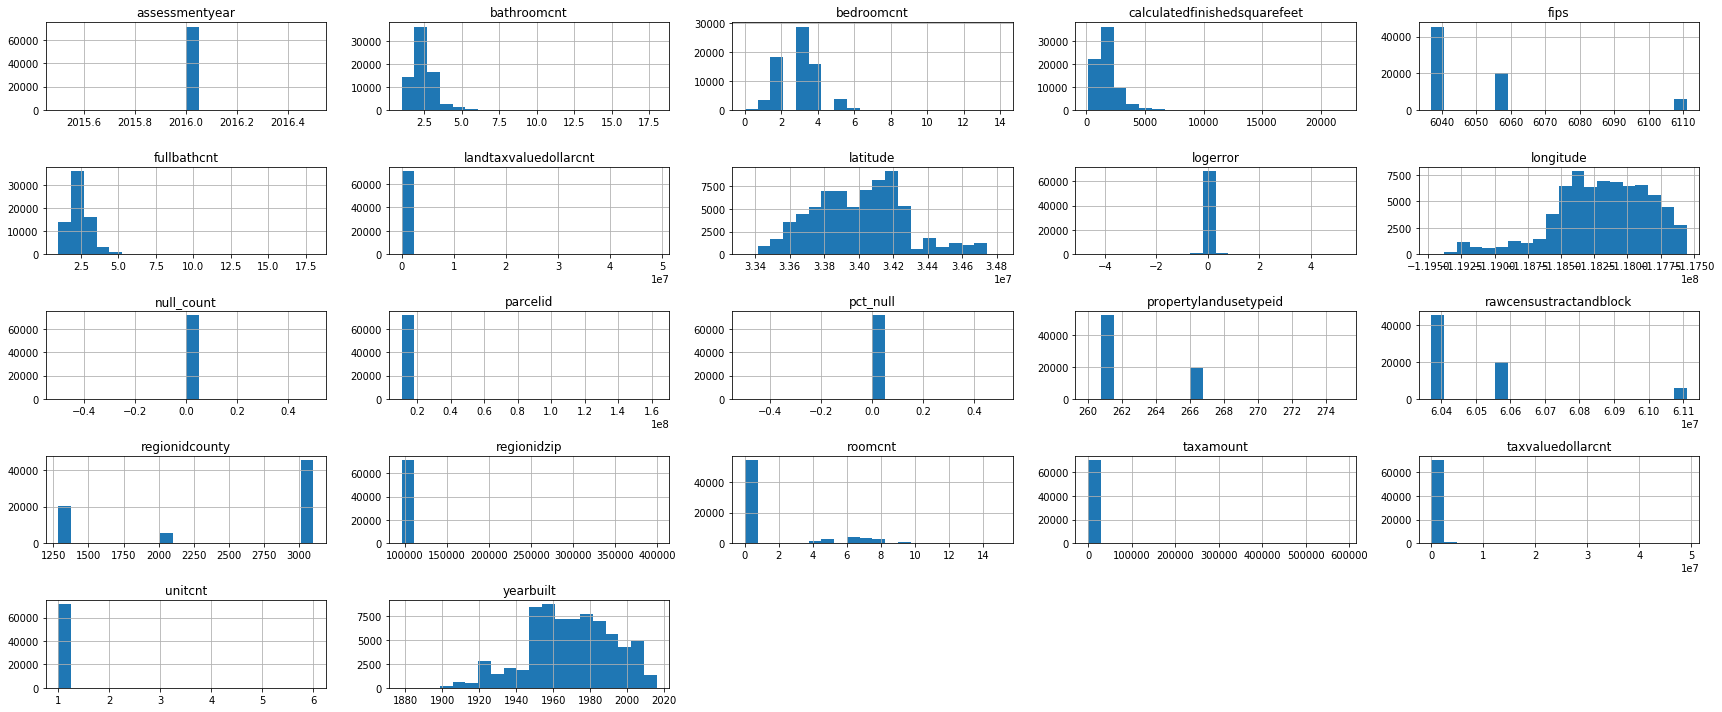

None [[<matplotlib.axes._subplots.AxesSubplot object at 0x7f8950555ed0>
  <matplotlib.axes._subplots.AxesSubplot object at 0x7f89389c0d90>]] None


In [1]:
# currently df is not split or scaled
import pandas as pd
import acquire
import prepare
import summarize
import wrangle_zillow

zillow = wrangle_zillow.wrangle_zillow_cluster()

In [2]:
zillow.head()

,parcelid,propertylandusetypeid,bathroomcnt,bedroomcnt,calculatedfinishedsquarefeet,fips,fullbathcnt,latitude,longitude,propertycountylandusecode,...,regionidzip,roomcnt,unitcnt,yearbuilt,taxvaluedollarcnt,assessmentyear,landtaxvaluedollarcnt,taxamount,logerror,propertylandusedesc
1,17052889,261.0,1.0,2.0,1465.0,6111.0,1.0,34449266.0,-119281531.0,1110,...,97099.0,5.0,1.0,1967.0,464000.0,2016.0,376000.0,5672.48,0.055619,Single Family Residential
2,14186244,261.0,2.0,3.0,1243.0,6059.0,2.0,33886168.0,-117823170.0,122,...,97078.0,6.0,1.0,1962.0,564778.0,2016.0,479489.0,6488.30,0.005383,Single Family Residential
3,12177905,261.0,3.0,4.0,2376.0,6037.0,3.0,34245180.0,-118240722.0,0101,...,96330.0,0.0,1.0,1970.0,145143.0,2016.0,36225.0,1777.51,-0.103410,Single Family Residential
4,10887214,266.0,3.0,3.0,1312.0,6037.0,3.0,34185120.0,-118414640.0,010C,...,96451.0,0.0,1.0,1964.0,119407.0,2016.0,45726.0,1533.89,0.006940,Condominium
5,17143294,266.0,2.0,3.0,1492.0,6111.0,2.0,34230044.0,-118993991.0,1129,...,97091.0,6.0,1.0,1982.0,331064.0,2016.0,132424.0,3508.10,-0.020526,Condominium


In [3]:
zillow.shape

(51735, 22)

In [ ]:
# try summarize function
zsummary = summarize.df_summary(zillow)

# is there a way to make this display differently? #
# yes, in command mode press shift o to toggle off auto scrolling for this cell
# https://www.google.com/search?client=safari&rls=en&sxsrf=ALeKk007WEMYRJLpmal8zeXv4dQ8a5Rb5Q:1602606052506&q=jupyter+show+full+output+without+scroll&sa=X&ved=2ahUKEwi0tuXj_LHsAhUDXK0KHampCYEQ1QIoAnoECBYQAw&biw=1440&bih=814

While this area of the country does have a broad range of housing values and therefore tax values, we know from previous work with this dataset that the tax rate range is from .001% up to 45% which is unrealistic for tax rates in 2017. Therefore we will determine a point at which to drop outliers above and below the IQR.

In [ ]:
zillow = prepare.add_upper_outlier_columns(zillow, k=1.5)  

outlier_cols = [col for col in zillow if col.endswith('_up_outliers')]
for col in outlier_cols:
    print('~~~\n' + col)
    data = zillow[col][zillow[col] > 0]
    print(data.describe())

*****
**Upperbound Outliers to HANDLE**   

**taxamount_outliers**     
count      4894.000000     
mean      10979.609790     
std       20235.975915     
min           0.830000     
25%        1997.677500     
50%        5367.625000     
75%       12289.405000     
max      573508.600000     
Name: taxamount_outliers, dtype: float64     
    
*******

**based on the above info drop upperbound outliers that are above 50th percentile of upperbound outliers**

reasoning: there is a significant jump from the 25th to 50th percentile making this a logical place to start removing outliers while still keeping some outliers above the upperbound

In [ ]:
zillow.head()

In [ ]:
# identify rows that are above 50th percentile
zup_drop_index = zillow[zillow.taxamount_up_outliers > 5365].index
# this identifies 2450 rows to drop

In [ ]:
# drop those rows from the dataframe
zillow.drop(zup_drop_index, inplace=True)

In [ ]:
zillow.shape

In [ ]:
zillow = prepare.add_lower_outlier_columns(zillow, k=1.5)  

outlier_cols = [col for col in zillow if col.endswith('_low_outliers')]
for col in outlier_cols:
    print('~~~\n' + col)
    data = zillow[col][zillow[col] > 0]
    print(data.describe())

********
**Lowerbound Outliers to HANDLE**

**taxamount_outliers**     
count    68981.000000    
mean      8203.408061    
std       3350.880803    
min       3210.485000    
25%       5817.075000    
50%       7473.745000    
75%       9695.125000    
max      21685.205000    
Name: taxamount_low_outliers, dtype: float64                  
   
*******

**based on the above drop rows that are above the 75th lowerbound percentile**

reasoning: there is a significant jump from the 50th to 75th percentile making this a logical place to start removing outliers while still keeping some outliers above the lowerbound

In [ ]:
# identify rows that are above 75th percentile
zlow_drop_index = zillow[zillow.taxamount_low_outliers > 9695].index
# this identifies 17,246 rows to drop

In [ ]:
# drop those rows from the dataframe
zillow.drop(zlow_drop_index, inplace=True)

In [ ]:
zillow.shape

In [ ]:
zlow_drop_index